## Some Libraries that we will need  

In [1]:
# For preprocessing: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For trying many technickes to choose the best of them:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\\Mzakra\\Sprints\\autos.csv").set_index("index")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 371528 observations and 20 features in this dataset. 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

* There is null values in the data.
* Some column need some changes in the data type.

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


* There is some outliers in "price","yearOfRegistration", "powerPS".
* nrOfPictures column has 0 in all of his rows.

In [6]:
# Number of unique brands
df["brand"].nunique()

40

In [7]:
df.duplicated().sum()

4

* There is a small amount of duplicates.

In [8]:
for i in list(df.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ dateCrawled ************


 2016-03-24 14:49:47    7
2016-03-19 21:49:56    6
2016-03-26 22:57:31    6
2016-03-22 10:42:10    5
2016-04-01 16:52:05    5
                      ..
2016-03-20 15:56:21    1
2016-03-14 03:22:32    1
2016-03-14 22:52:34    1
2016-03-31 23:53:26    1
2016-03-07 19:39:19    1
Name: dateCrawled, Length: 280500, dtype: int64

 count                  371528
unique                 280500
top       2016-03-24 14:49:47
freq                        7
Name: dateCrawled, dtype: object 


 ************ name ************


 Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_i

**Observations:**
* There is a wrongly included value in price column (0).
* There is some cars that has a year_of_registration that have not come yet.
* There is a wrongly included value in powerPs column (0).
* There is a wrongly included value in monthOfRegistration column (0).
* All values of nrOfPictures is 0.

# Basic Cleaning

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Droping the wrongly values 

In [10]:
df.drop(df.index[df['price'] ==0], inplace = True)
df.drop(df.index[df['powerPS'] ==0], inplace = True)
df.drop(df.index[df["monthOfRegistration"] ==0], inplace = True)

In [11]:
print(df.price.value_counts(),"\n")
print(df.powerPS.value_counts(),"\n")
print(df.monthOfRegistration.value_counts(),"\n")

1500     4167
500      3981
2500     3527
1200     3508
1000     3289
         ... 
19498       1
79980       1
36275       1
11247       1
10985       1
Name: price, Length: 5413, dtype: int64 

75      21124
60      13975
150     13972
140     12958
101     11951
        ...  
5867        1
2172        1
581         1
619         1
564         1
Name: powerPS, Length: 754, dtype: int64 

3     33130
6     30128
4     28258
5     27873
7     26287
10    24854
12    23024
11    23019
9     22810
1     22114
8     21476
2     20546
Name: monthOfRegistration, dtype: int64 



##  Droping nrOfPictures column since all of it values = 0

In [12]:
df.drop(columns = "nrOfPictures", inplace = True)

## Data type

In [13]:
df.loc[:,["dateCrawled","dateCreated","lastSeen"]][:5]

,dateCrawled,dateCreated,lastSeen
index,,,
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,2016-04-04 00:00:00,2016-04-06 19:17:07


### Changing there data types to date time  

In [14]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [15]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

## Missing Values 

In [16]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            16062
yearOfRegistration         0
gearbox                 4342
powerPS                    0
model                  10627
kilometer                  0
monthOfRegistration        0
fuelType               14924
brand                      0
notRepairedDamage      37827
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

## Changing the missing values with the mode 

In [17]:
df["vehicleType"]=df["vehicleType"].fillna(df["vehicleType"].mode()[0])
df["gearbox"]=df["gearbox"].fillna(df["gearbox"].mode()[0])
df["fuelType"]=df["fuelType"].fillna(df["fuelType"].mode()[0])
df["notRepairedDamage"]=df["notRepairedDamage"].fillna(df["notRepairedDamage"].mode()[0])

df["model"].fillna(value = "Not Defiend",inplace = True)

In [18]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

### Handling Outliers.

In [19]:
# filter the price to make it between 500 and 150000
df = df.loc[df["price"] < 150000]
df = df.loc[df["price"] > 500]

df = df.loc[df["yearOfRegistration"] < 2023]
#I don't think there is any car for sale under 1970
df = df.loc[df["yearOfRegistration"] > 1970]

# filter the powerPs to make it between 1 and 1000
df = df.loc[df["powerPS"] > 0]
df = df.loc[df["powerPS"] < 1000]

# Some Thoughtful cleaning

In [20]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,Not Defiend,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04,33775,2016-04-06 19:17:07


In [21]:
# Extract the year and season from dateCreated 
df["year_of_created"] = df["dateCreated"].dt.year
df["date_created_season"] = df["dateCreated"].dt.month.map(lambda x: "winter" if 12 >= x >= 1 or x == 12 else "summer")

In [22]:
# Change notRepairedDamage values from german lang to english.
df["notRepairedDamage"].replace({"ja":"yes",
                                "nein":"no"}
                                ,inplace=True)

In [23]:
df["notRepairedDamage"].value_counts()

no     263745
yes     20649
Name: notRepairedDamage, dtype: int64

# Visualisation 

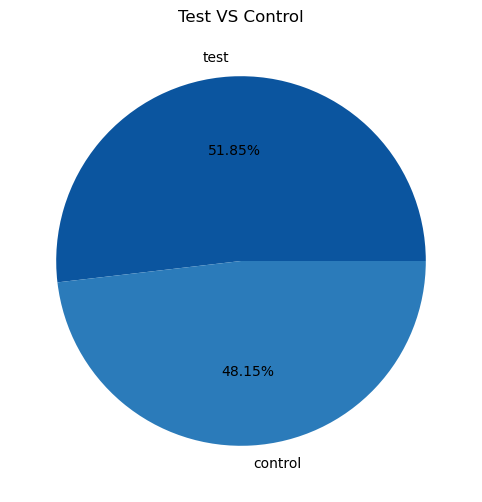

In [24]:
plt.figure(figsize = (12, 6))
abtest_df = (df['abtest'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(abtest_df['abtest'], labels = abtest_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Test VS Control");

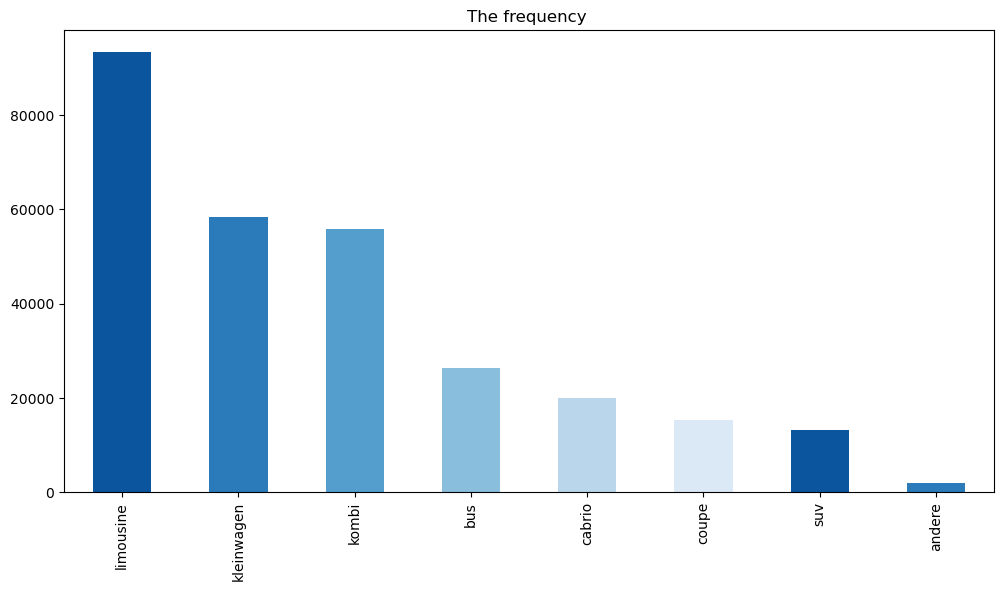

In [25]:
vehicleType_counts = df['vehicleType'].value_counts()
vehicleType_counts.plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "The frequency ", figsize = (12,6));

### ▶️Limousine is the most selling car in our data And andere is the least (Limousine in german lang = sedan in eng)

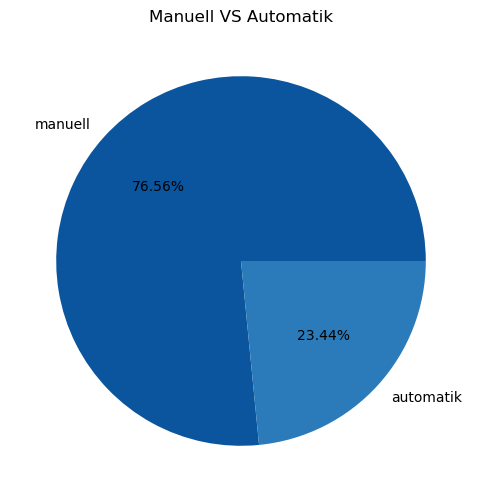

In [26]:
plt.figure(figsize = (12, 6))
gearbox_df = (df['gearbox'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(gearbox_df['gearbox'], labels = gearbox_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Manuell VS Automatik");

### ▶️3/4 of our cars in manuell 

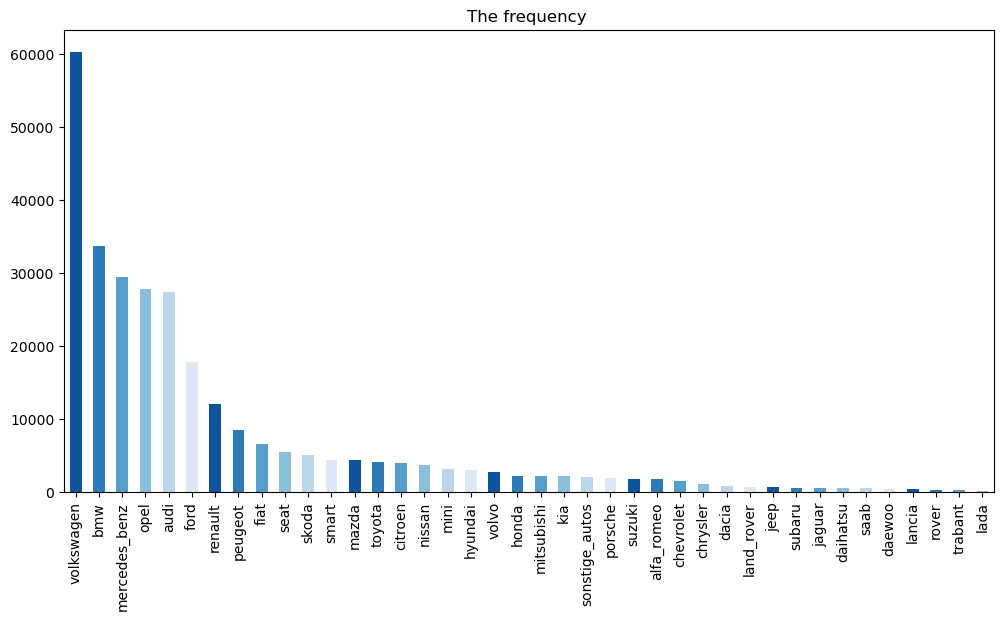

In [27]:
brand_counts = df['brand'].value_counts()
brand_counts.plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "The frequency ", figsize = (12,6));

### ▶️Volkswagen taking the lead by far from all other cars  

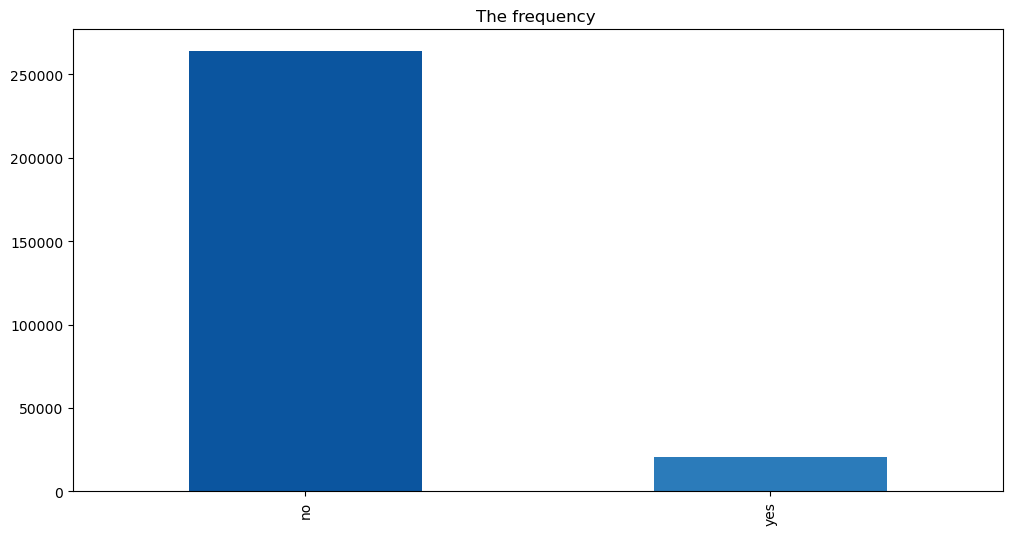

In [28]:
notRepairedDamage_counts = df['notRepairedDamage'].value_counts()
notRepairedDamage_counts.plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "The frequency ", figsize = (12,6));

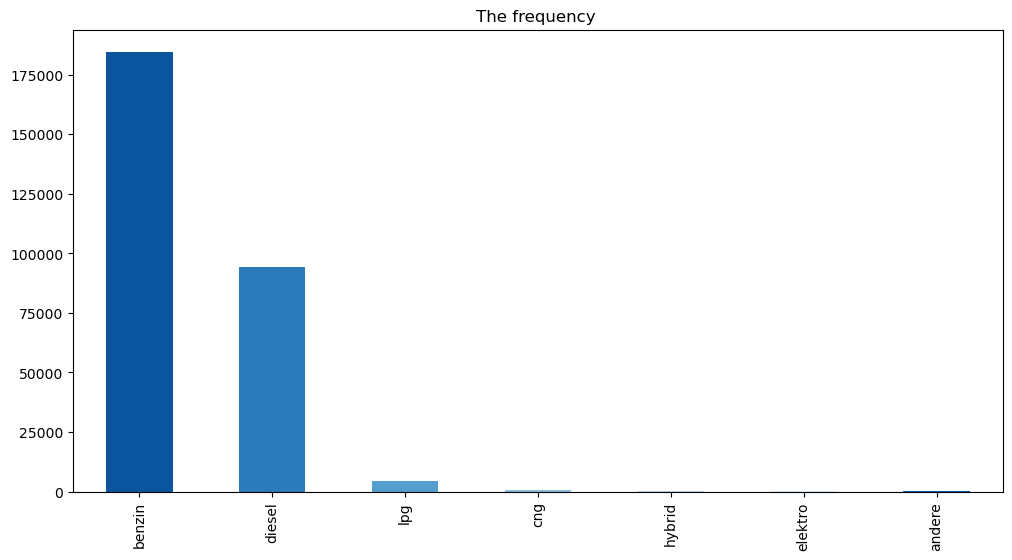

In [29]:
fuelType_counts = df['fuelType'].value_counts()
fuelType_counts.plot(kind = 'bar', color = sns.color_palette("Blues_r"), title = "The frequency ", figsize = (12,6));

### ▶️ Benzin cars is more than half of our data   

## Final Preprocessing Steps 

In [30]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_of_created,date_created_season
index,,,,,,,,,,,,,,,,,,,,,
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,2016,winter
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,125000,8,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46,2016,winter
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,2016,winter
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,2016,winter
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2016,winter


## Scaling the numerical column

In [31]:
def scale_column(data, column_name):
    scaler = StandardScaler()
    column_to_scale = data[column_name]
    column_to_scale = column_to_scale.values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(column_to_scale)
    data[column_name] = scaled_data
    
columns_to_scale = ['powerPS', 'kilometer',"yearOfRegistration",'monthOfRegistration',"year_of_created"]
for column in columns_to_scale:
    scale_column(df, column)

In [32]:
# Taking a copy from the data to encod it
df_enc = df.copy()
df_enc.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,year_of_created,date_created_season
index,,,,,,,,,,,,,,,,,,,,,
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,1.046743,manuell,0.959175,...,0.018983,-0.417474,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,0.009562,winter
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,-0.025977,automatik,0.528837,...,0.018983,0.479250,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46,0.009562,winter
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,-0.485714,manuell,-0.873746,...,0.649298,-0.118566,benzin,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0.009562,winter
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,0.587006,manuell,-0.969376,...,-0.863457,0.180342,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,0.009562,winter
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,-1.405188,manuell,-0.443408,...,0.649298,1.077065,benzin,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,0.009562,winter


### First remove the column we won't need it in training.

* will drop offerType column because almost all of it's values are "Angebot".
* will drop seller column because almost all of it's values are "Privat".
* will drop postalCode column because the column contain alot of unique values and dont's give much info.

In [33]:
df_enc.drop(["dateCrawled","name","offerType","seller","dateCreated","postalCode","lastSeen"],axis=1,inplace=True)
df_enc.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,year_of_created,date_created_season
index,,,,,,,,,,,,,,
1,18300,test,coupe,1.046743,manuell,0.959175,Not Defiend,0.018983,-0.417474,diesel,audi,yes,0.009562,winter
2,9800,test,suv,-0.025977,automatik,0.528837,grand,0.018983,0.479250,diesel,jeep,no,0.009562,winter
3,1500,test,kleinwagen,-0.485714,manuell,-0.873746,golf,0.649298,-0.118566,benzin,volkswagen,no,0.009562,winter
4,3600,test,kleinwagen,0.587006,manuell,-0.969376,fabia,-0.863457,0.180342,diesel,skoda,no,0.009562,winter
5,650,test,limousine,-1.405188,manuell,-0.443408,3er,0.649298,1.077065,benzin,bmw,yes,0.009562,winter


In [34]:
# Encoding the string data to fit it in the model
encoding_col = ['abtest', 'vehicleType','gearbox', 'model','fuelType','notRepairedDamage',"date_created_season","brand"]
for col in encoding_col:
    cat_enc = LabelEncoder()
    cat_enc.fit(df_enc[col])
    df_enc[f'{col}_enc'] = cat_enc.transform(df_enc[col])
    df_enc.drop(col, axis='columns', inplace=True)
df_enc.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,year_of_created,abtest_enc,vehicleType_enc,gearbox_enc,model_enc,fuelType_enc,notRepairedDamage_enc,date_created_season_enc,brand_enc
index,,,,,,,,,,,,,,
1,18300,1.046743,0.959175,0.018983,-0.417474,0.009562,1,3,1,26,3,1,0,1
2,9800,-0.025977,0.528837,0.018983,0.479250,0.009562,1,7,0,120,3,0,0,14
3,1500,-0.485714,-0.873746,0.649298,-0.118566,0.009562,1,4,1,119,1,0,0,38
4,3600,0.587006,-0.969376,-0.863457,0.180342,0.009562,1,4,1,104,3,0,0,31
5,650,-1.405188,-0.443408,0.649298,1.077065,0.009562,1,6,1,11,1,1,0,2


In [35]:
# Feature Extraction
X = df_enc.drop(columns ="price")
y = df_enc["price"]

In [36]:
# Getting the shape of X and y
print(X.shape)
print(y.shape)

(284394, 13)
(284394,)


In [37]:
# Spliting the data into training and testing data with 80,20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
# Printing the shape of our training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (227515, 13)
y_train shape: (227515,)
X_test shape: (56879, 13)
y_test shape: (56879,)


**Some points will help choose the model:**
* Our data is labeled so we will use Supervised Learning model.
* Our label has num values so we will use Regression model.

In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
# Getting the score of train and test data
print("Training Accuracy:" , round(model.score(X_train, y_train),2),"%")
print("Testing Accuracy:" , round(model.score(X_test, y_test),2),"%")

Training Accuracy: 0.98 %
Testing Accuracy: 0.88 %


* It's not the best score, but it's the best I've ever gotten